# Data preparation

In this notebook, we process interferometric measurement sets and create one-dimentional azimuthally averaged visibilities.
If you already have such data, please proceed to [the next section](tutorial_1.ipynb).

## 1. Import modules

We import `frappe` and some modules first.

In [2]:
import frappe
import casatasks
import casatools

## 2. Process data

The CASA measurement sets have sometimes very complex structure. For a simple treatment, we first split the dataset into individual spectral windows.

In [3]:
ms = frappe.ms( casatools = casatools, casatasks = casatasks )

In [4]:
splitted_vis = ms.split( vis = '../../../demo/HD169142_band9.ms', dryrun = False )

Created working directory: ./working_HD169142_band9


``splitted_vis`` stored the paths of the splitted ms. If ``dryrun == True`` , the function just returns the expected paths without actually splitting the ms.

In [5]:
splitted_vis

['./working_HD169142_band9/spw_id_0.ms',
 './working_HD169142_band9/spw_id_1.ms',
 './working_HD169142_band9/spw_id_2.ms',
 './working_HD169142_band9/spw_id_3.ms',
 './working_HD169142_band9/spw_id_4.ms',
 './working_HD169142_band9/spw_id_5.ms',
 './working_HD169142_band9/spw_id_6.ms',
 './working_HD169142_band9/spw_id_7.ms',
 './working_HD169142_band9/spw_id_8.ms',
 './working_HD169142_band9/spw_id_9.ms',
 './working_HD169142_band9/spw_id_10.ms',
 './working_HD169142_band9/spw_id_11.ms',
 './working_HD169142_band9/spw_id_12.ms',
 './working_HD169142_band9/spw_id_13.ms',
 './working_HD169142_band9/spw_id_14.ms',
 './working_HD169142_band9/spw_id_15.ms',
 './working_HD169142_band9/spw_id_16.ms',
 './working_HD169142_band9/spw_id_17.ms',
 './working_HD169142_band9/spw_id_18.ms',
 './working_HD169142_band9/spw_id_19.ms',
 './working_HD169142_band9/spw_id_20.ms',
 './working_HD169142_band9/spw_id_21.ms',
 './working_HD169142_band9/spw_id_22.ms',
 './working_HD169142_band9/spw_id_23.ms',
 '

We now want to one-dimenional binned visibilities ( $V(q)$ ).

``get_visibilities()`` performs 1) binning along the uv-distance (in the wavelength unit) after deprojection per each frequency channel, 2) linear fitting along the freq axis to each binned uv-distance points, and saves the visibility value at a specified reference frequency with uncertainty.

In this example, we have a band 9 data. Therefore,

In [6]:
ms.get_visibilities( vis = [splitted_vis],
                     nu = [671.0e9],
                     pa = 6.31,
                     incl = 6.28,
                     FoV = 10.0,
                     output = 'HD169142_band9'
                   )

Saved visibility data to HD169142_band9.pkl


Sucesfully saved! In this case, we assumed that one frequency is enought to represent the whole data (i.e., the whole frequency range is small and linear approximation is valid). However, for instance, lower frequnency bands may have a much larger relative band width. In this case, you can make multiple channels by running

In [ ]:
# we do not run this cell in this notebook
ms.get_visibilities( vis = [splitted_vis1, splitted_vis2],
                     nu = [669.0e9, 672.0e9],
                     pa = 6.31,
                     incl = 6.28,
                     FoV = 10.0,
                     output = 'HD169142_band9'
                   )

Here, for example, ``splitted_vis1`` and ``splitted_vis2`` correspond to the lower and upper side bands, respectively, and the two frequencies are used to represent them.

Annyway, let's check the results. You can access to the saved file with pickle.

In [13]:
import pickle

with open('HD169142_band9.pkl', 'rb') as f:
    data = pickle.load(f)

q = data['q'] # uv-distance in lambda
V = data['V'] # visibility in Jy
s = data['s'] # uncertainty of V

Text(0, 0.5, '$V\\ ({\\rm Jy})$')

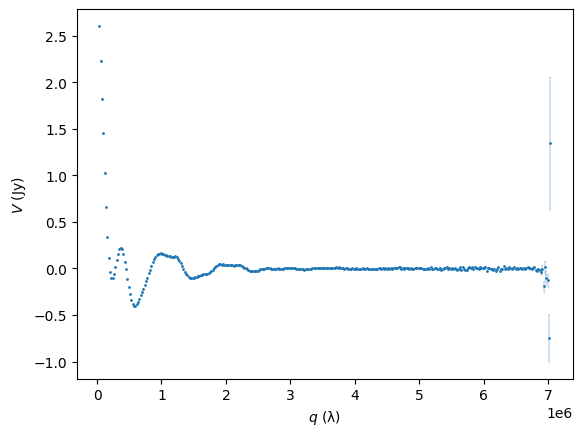

In [18]:
import matplotlib.pyplot as plt

inu = 0
plt.errorbar(q[inu], V[inu], yerr = s[inu],
             capsize=0.1, fmt='o', markersize=1, elinewidth = 0.3 )
    

plt.xlabel(r'$q\ ({\rm \lambda})$')
plt.ylabel(r'$V\ ({\rm Jy})$')